In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import os

In [4]:
df = pd.read_excel("..\\data\\jobdata_preprocessed.xlsx")

In [3]:
# 查看数据数量
total_records = df.shape[0]
print(f"总招聘数: {total_records}")

总招聘数: 19131


In [5]:
# 查看数据格式
df.head()

,岗位编号,岗位名称,工作类型,工作经验,城市,行政区域,街道区域,企业名称,企业标签,企业人数规模,...,融资阶段,工作简介,企业财产类型,招聘信息更新时间,招募人数,岗位标签,岗位分类,salary_min,salary_max,salary_type
0,CC120994460J40664011302,天猫运营店长,全职,3-5年,北京,西城,椿树,北京市美顺雅鞋业有限责任公司,NaN,500-999人,...,未融资,岗位职责：一、 店铺运营与优化1、负责开店基本操作、店铺的装修、产品上新；2、负责产品图片、...,民营,2024-11-15 10:26:26,1,天猫;淘宝;服装;,淘宝/天猫运营,96000,144000,M
1,CC447718930J40602358006,天猫运营经理/店长,全职,3-5年,北京,朝阳,麦子店,克拉斯国际家居,NaN,500-999人,...,未融资,1、天猫渠道整体规划和执⾏，发展⽅案确认；2、天猫店铺的运营和推⼴管理；3、制定并执⾏天猫销...,其它,2024-11-15 00:19:43,1,天猫;淘宝;家具;店长;经理;新媒体运营;,淘宝/天猫运营,120000,167999,M
2,CC130850440J40657947102,天猫运营助理,全职,经验不限,北京,海淀,西北旺,北京绿伞科技股份有限公司,NaN,500-999人,...,未融资,岗位职责：1.负责店铺日常运营及页面维护优化，包括商品管理、促销设置、页面替换等；2.负责店...,民营,2024-11-14 16:44:33,1,淘宝;日化;助理;,淘宝/天猫运营,84000,120000,M
3,CC513268080J40826412204,天猫运营店长,全职,1-3年,北京,海淀,东升,北京意间文化艺术发展有限公司,NaN,20-99人,...,NaN,经验要求：天猫、抖音、得物、有赞等相关工作经验3年以上；技能要求：一、数据分析能力：能够分析...,民营,2024-11-13 16:34:52,1,天猫;淘宝;饰品;店长;,淘宝/天猫运营,96000,120000,M
4,CC447718930J40602828706,天猫运营经理/天猫店长,全职,5-10年,北京,朝阳,麦子店,克拉斯国际家居,NaN,500-999人,...,未融资,岗位职责： 1、天猫渠道整体规划和执⾏，发展⽅案确认； 2、天猫店铺的运营和推⼴管理； 3、...,其它,2024-11-15 00:05:03,1,淘宝/天猫;京东;抖音小店;天猫推广;付费推广;,电商经理/主管,120000,144000,M


# 按照岗位类型统计招聘信息数

In [4]:
job_ad_counts = df["岗位分类"].value_counts().reset_index()
job_ad_counts.columns = ["岗位分类", "job_ad_count"]

job_ad_counts.head(25)

,岗位分类,job_ad_count
0,新媒体运营,2961
1,编导,1998
2,剪辑师,1081
3,产品经理,878
4,淘宝/天猫运营,724
5,编辑,712
6,运营助理/专员,466
7,市场营销,422
8,视频编辑,412
9,网络销售,410


In [ ]:
# 导出
job_ad_counts_output = "..\\data\\task1\\job_ad_counts.xlsx"
job_ad_counts.to_excel(job_ad_counts_output, index = False, engine = 'openpyxl')

## 绘制排名前25的招聘数据条形图

In [ ]:
# 指定中文字体
font_path = "D:\\安装包\\微软雅黑.ttf"

zh_font = font_manager.FontProperties(fname=font_path)
print(zh_font.get_name())

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False 

Microsoft YaHei


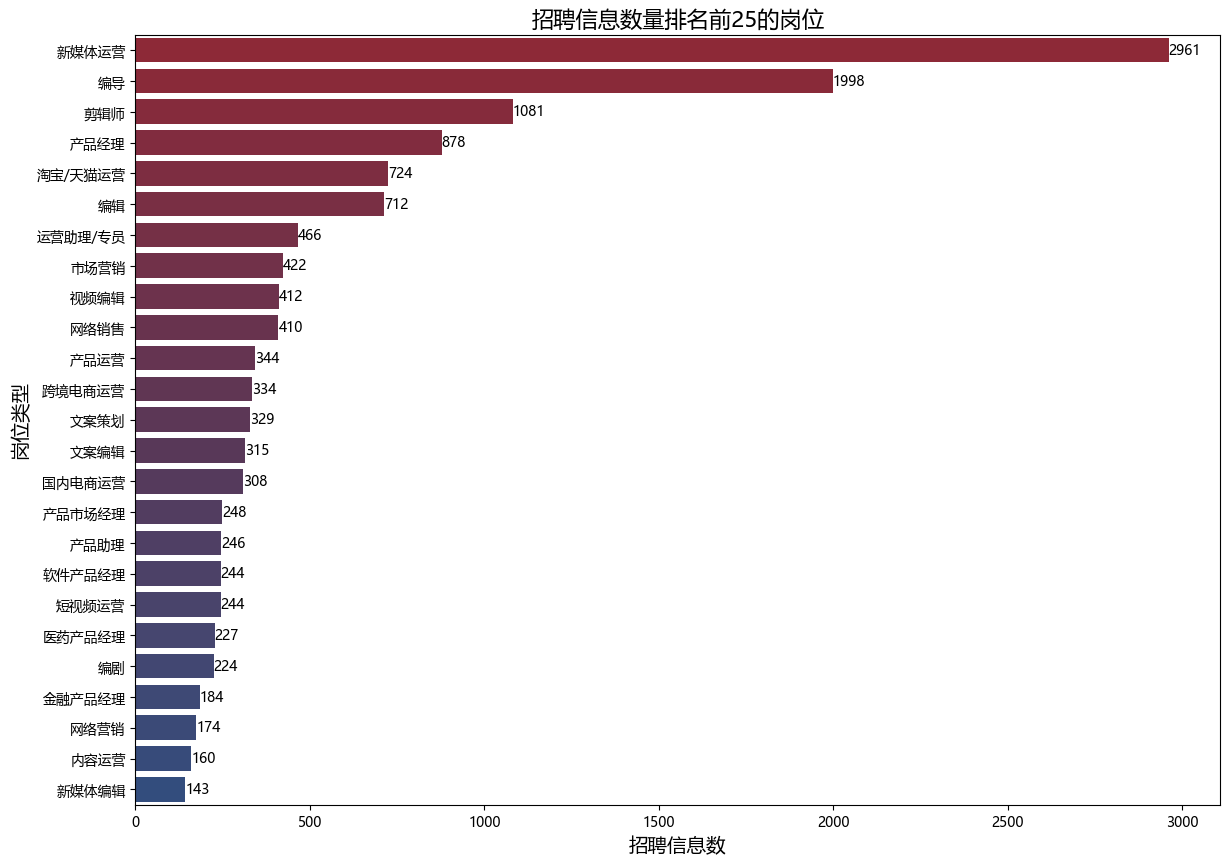

In [ ]:
# 条形图绘制
top_25_jobs = job_ad_counts.head(25)

colors = ['#9E182B', '#274989']
palette = sns.blend_palette(colors, n_colors=len(top_25_jobs))

plt.figure(figsize=(14, 10))
ax = sns.barplot(x='job_ad_count', y='岗位分类', data=top_25_jobs, palette=palette)

for index, value in enumerate(top_25_jobs['job_ad_count']):
    ax.text(value, index, f'{value}', color='black', ha='left', va='center')

plt.title('招聘信息数量排名前25的岗位', fontsize=16)
plt.xlabel('招聘信息数', fontsize=14)
plt.ylabel('岗位类型', fontsize=14)

output_path = os.path.join("..\\img\\task1", "招聘信息数量排名前25的岗位.png")
plt.savefig(output_path, dpi = 300, bbox_inches='tight')

# 按城市统计招聘信息数
1. 统计每个城市的招聘信息数量
2. 在每个城市的招聘信息中，统计岗位名称的数量，并筛选出每个城市中数量排名前十的岗位名称
    > 绘制旭日图，内层为城市，外层为前十的岗位名称（另寻他法，此处只提供数据）
4. 查看武汉的职位分布
    > 绘制基于地图的热度图（另寻他法，此处只提供数据）

In [46]:
# 统计每个城市的招聘信息数量
city_ad_counts = df["城市"].value_counts().reset_index()
city_ad_counts.columns = ["城市", "city_ad_count"]

city_ad_counts.head()

,城市,city_ad_count
0,郑州,852
1,北京,846
2,沈阳,846
3,广州,844
4,成都,842


In [ ]:
city_ad_counts_output = "..\\data\\task1\\city_ad_counts.xlsx"
city_ad_counts.to_excel(city_ad_counts_output, index = False, engine = 'openpyxl')

In [ ]:
# 统计每个城市中每个岗位的招聘信息数
city_job_counts = df.groupby(['城市', '岗位名称']).size().reset_index(name = 'city_ad_count')

# 排序，取top10
top_10_per_city = city_job_counts.groupby('城市').apply(
    lambda x: x.sort_values(by = 'city_ad_count', ascending=False).head(10)
).reset_index(drop = True)

cities = top_10_per_city['城市'].unique()
top_10_per_city_df = pd.DataFrame(index=range(10), columns = pd.MultiIndex.from_product([cities, ['岗位名称', '招聘数量']]))

# 填充每个城市的岗位名称和数量
for city in cities:
    city_top_10 = top_10_per_city[top_10_per_city['城市'] == city]
    top_10_per_city_df[(city, '岗位名称')] = city_top_10['岗位名称'].values[:10]
    top_10_per_city_df[(city, '招聘数量')] = city_top_10['city_ad_count'].values[:10]

top_10_per_city_df.fillna('', inplace=True)
top_10_per_city_df.head()

上海            北京            南京            厦门           哈尔滨       ...  \
      岗位名称 招聘数量     岗位名称 招聘数量     岗位名称 招聘数量     岗位名称 招聘数量     岗位名称 招聘数量  ...   
0    新媒体运营   28  新媒体运营专员   31    新媒体运营   35     产品经理   26    新媒体运营   58  ...   
1  新媒体运营专员   23    新媒体运营   27    短视频编导   25    新媒体运营   26  新媒体运营专员   30  ...   
2     产品经理   18    短视频编导   20     产品经理   16  新媒体运营专员   21     产品经理   29  ...   
3    短视频编导   16     视频编导   11     产品运营   15    短视频编导   13  新媒体运营助理   11  ...   
4     淘宝运营   10     产品经理    9  新媒体运营专员   13   短视频剪辑师   13     运营专员   11  ...   

        郑州                               重庆            长春            长沙       \
      岗位名称 招聘数量                        岗位名称 招聘数量     岗位名称 招聘数量     岗位名称 招聘数量   
0    短视频编导   37                       新媒体运营   32  新媒体运营专员   48    新媒体运营   42   
1    新媒体运营   37                     新媒体运营专员   30    新媒体运营   39    短视频编导   40   
2  新媒体运营专员   34                        产品经理   29     产品经理   36     产品经理   22   
3     产品经理   21  短视频剪辑/包吃住/70000-15000+五险一金   18    短视频编导   36  新媒体运营专员   18   
4  抖音短视频编导   10                       短视频编导   16     运营专员   17     运营专员   12   

        青岛       
      岗位名称 招聘数量  
0    新媒体运营   40  
1     产品经理   29  
2    短视频编导   20  
3  新媒体运营专员   19  
4     天猫运营   11  

[5 rows x 48 columns]

In [7]:
# 展平列名
top_10_per_city_df.columns = ['_'.join(col).strip() for col in top_10_per_city_df.columns.values]

top10_ad_per_city_output = "..\\data\\task1\\top10_ad_per_city.xlsx"
top_10_per_city_df.to_excel(top10_ad_per_city_output, index=False, engine='openpyxl')


In [44]:
# 岗位在武汉市内的数量分布
wuhan_ad_counts = df[df['城市'] == '武汉']
districts_ad_count = wuhan_ad_counts['行政区域'].value_counts()

districts_ad_count.head()

行政区域
洪山    181
江夏    146
武昌    138
江汉     83
蔡甸     60
Name: count, dtype: int64

In [ ]:
wuhan_districts_ad_count = "..\\data\\task1\\wuhan_districts_ad_count.xlsx"
districts_ad_count.to_excel(wuhan_districts_ad_count, index = True, engine = 'openpyxl')

# 按经验要求统计招聘信息数

In [49]:
exp_ad_counts = df["工作经验"].value_counts().reset_index()
exp_ad_counts.columns = ["工作经验", "exp_ad_counts"]

exp_ad_counts.head()

,工作经验,exp_ad_counts
0,1-3年,7560
1,经验不限,5757
2,3-5年,3930
3,5-10年,1290
4,1年以下,468


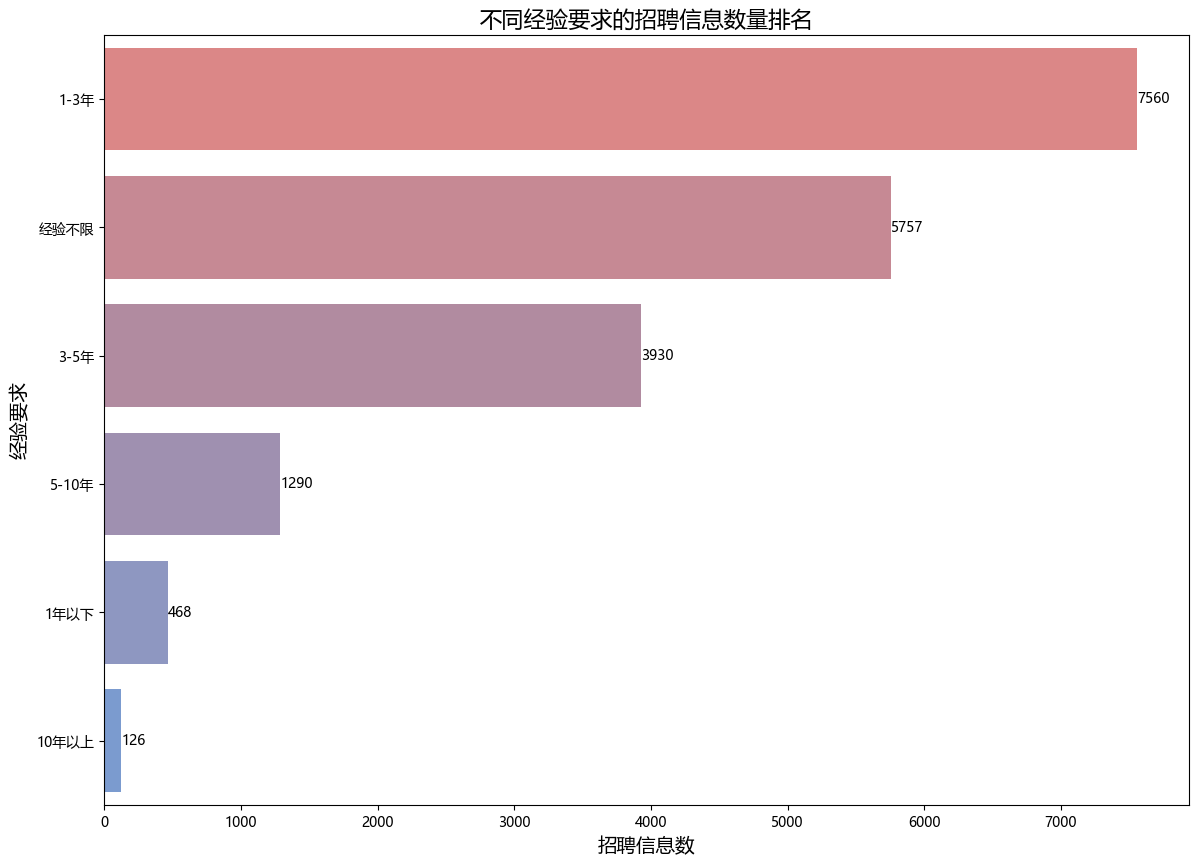

In [55]:
# 条形图绘制
colors = ['#E97979', '#6D97DD']
palette = sns.blend_palette(colors, n_colors=len(exp_ad_counts))

plt.figure(figsize=(14, 10))
ax = sns.barplot(x='exp_ad_counts', y='工作经验', data=exp_ad_counts, palette=palette)

for index, value in enumerate(exp_ad_counts['exp_ad_counts']):
    ax.text(value, index, f'{value}', color='black', ha='left', va='center')

plt.title('不同经验要求的招聘信息数量排名', fontsize=16)
plt.xlabel('招聘信息数', fontsize=14)
plt.ylabel('经验要求', fontsize=14)

plt.show()

In [ ]:
exp_ad_counts_output = "..\\data\\task1\\exp_ad_counts.xlsx"
exp_ad_counts.to_excel(exp_ad_counts_output, index = False, engine = 'openpyxl')

# 按学历要求统计招聘信息数

In [51]:
edu_ad_counts = df["学历"].value_counts().reset_index()
edu_ad_counts.columns = ["学历", "edu_ad_counts"]

edu_ad_counts.head()

,学历,edu_ad_counts
0,本科,8111
1,大专,7779
2,学历不限,2271
3,硕士,371
4,中专/中技,301


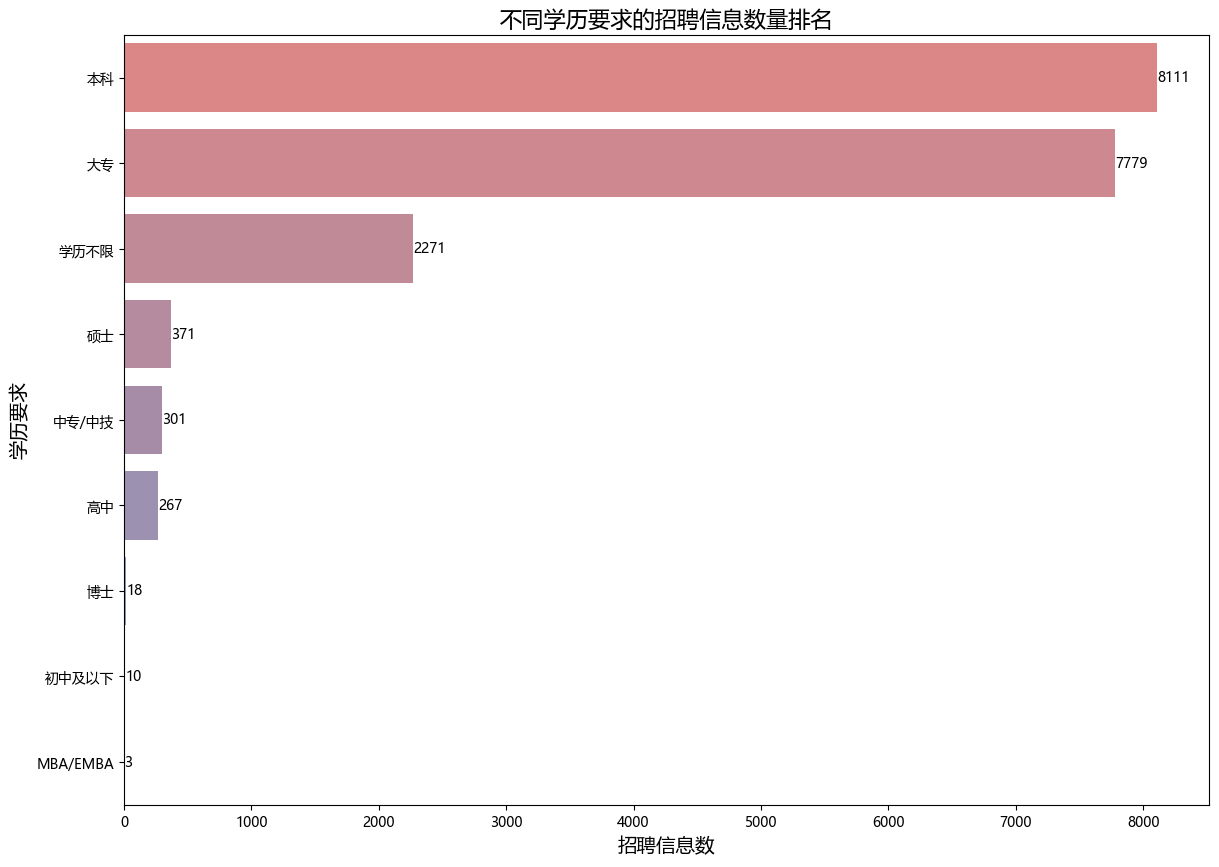

In [53]:
# 条形图绘制
colors = ['#E97979', '#6D97DD']
palette = sns.blend_palette(colors, n_colors=len(edu_ad_counts))

plt.figure(figsize=(14, 10))
ax = sns.barplot(x='edu_ad_counts', y='学历', data=edu_ad_counts, palette=palette)

for index, value in enumerate(edu_ad_counts['edu_ad_counts']):
    ax.text(value, index, f'{value}', color='black', ha='left', va='center')

plt.title('不同学历要求的招聘信息数量排名', fontsize=16)
plt.xlabel('招聘信息数', fontsize=14)
plt.ylabel('学历要求', fontsize=14)

plt.show()

In [ ]:
edu_ad_counts_output = "..\\data\\task1\\edu_ad_counts.xlsx"
edu_ad_counts.to_excel(edu_ad_counts_output, index = False, engine = 'openpyxl')

# 按企业信息统计招聘信息数

## 按照企业类型

In [58]:
comp_type_ad_counts = df["企业财产类型"].value_counts().reset_index()
comp_type_ad_counts.columns = ["企业财产类型", "comp_type_ad_counts"]

comp_type_ad_counts.head()

,企业财产类型,comp_type_ad_counts
0,民营,11506
1,股份制企业,1361
2,上市公司,1300
3,其它,908
4,国企,855


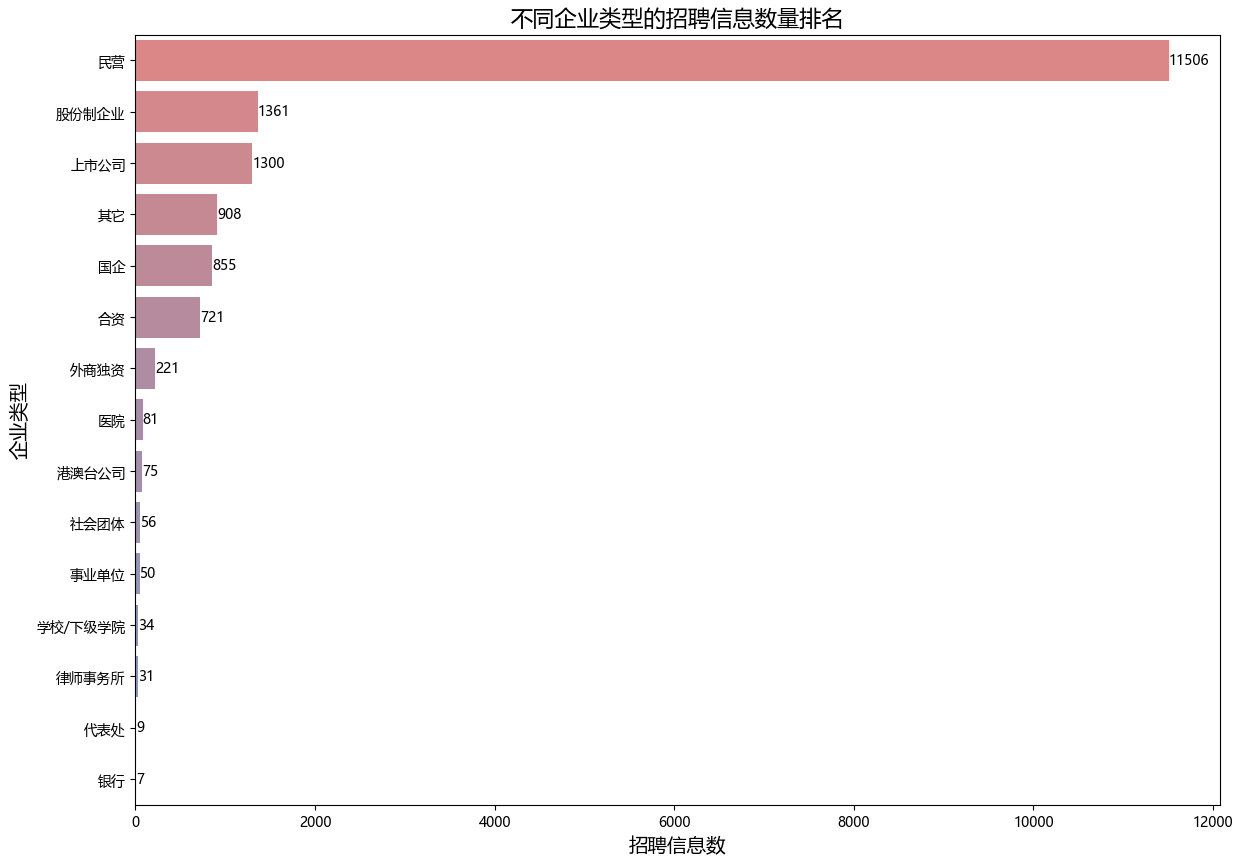

In [61]:
# 条形图绘制
colors = ['#E97979', '#6D97DD']
palette = sns.blend_palette(colors, n_colors=len(comp_type_ad_counts))

plt.figure(figsize=(14, 10))
ax = sns.barplot(x='comp_type_ad_counts', y='企业财产类型', data=comp_type_ad_counts, palette=palette)

for index, value in enumerate(comp_type_ad_counts['comp_type_ad_counts']):
    ax.text(value, index, f'{value}', color='black', ha='left', va='center')

plt.title('不同企业类型的招聘信息数量排名', fontsize=16)
plt.xlabel('招聘信息数', fontsize=14)
plt.ylabel('企业类型', fontsize=14)

plt.show()

In [ ]:
comp_type_ad_counts_output = "..\\data\\task1\\comp_type_ad_counts.xlsx"
comp_type_ad_counts.to_excel(comp_type_ad_counts_output, index = False, engine = 'openpyxl')

## 按照企业名称
筛选出top25

In [62]:
comp_ad_counts = df["企业名称"].value_counts().reset_index()
comp_ad_counts.columns = ["企业名称", "comp_ad_counts"]

comp_ad_counts.head()

,企业名称,comp_ad_counts
0,新东方教育科技集团有限公司,91
1,北京科锐国际人力资源股份有限公司苏州分公司,77
2,深圳市乐有家控股集团有限公司,71
3,宁波渠成集团有限公司,65
4,位来小猎(宁波)信息技术有限公司,64


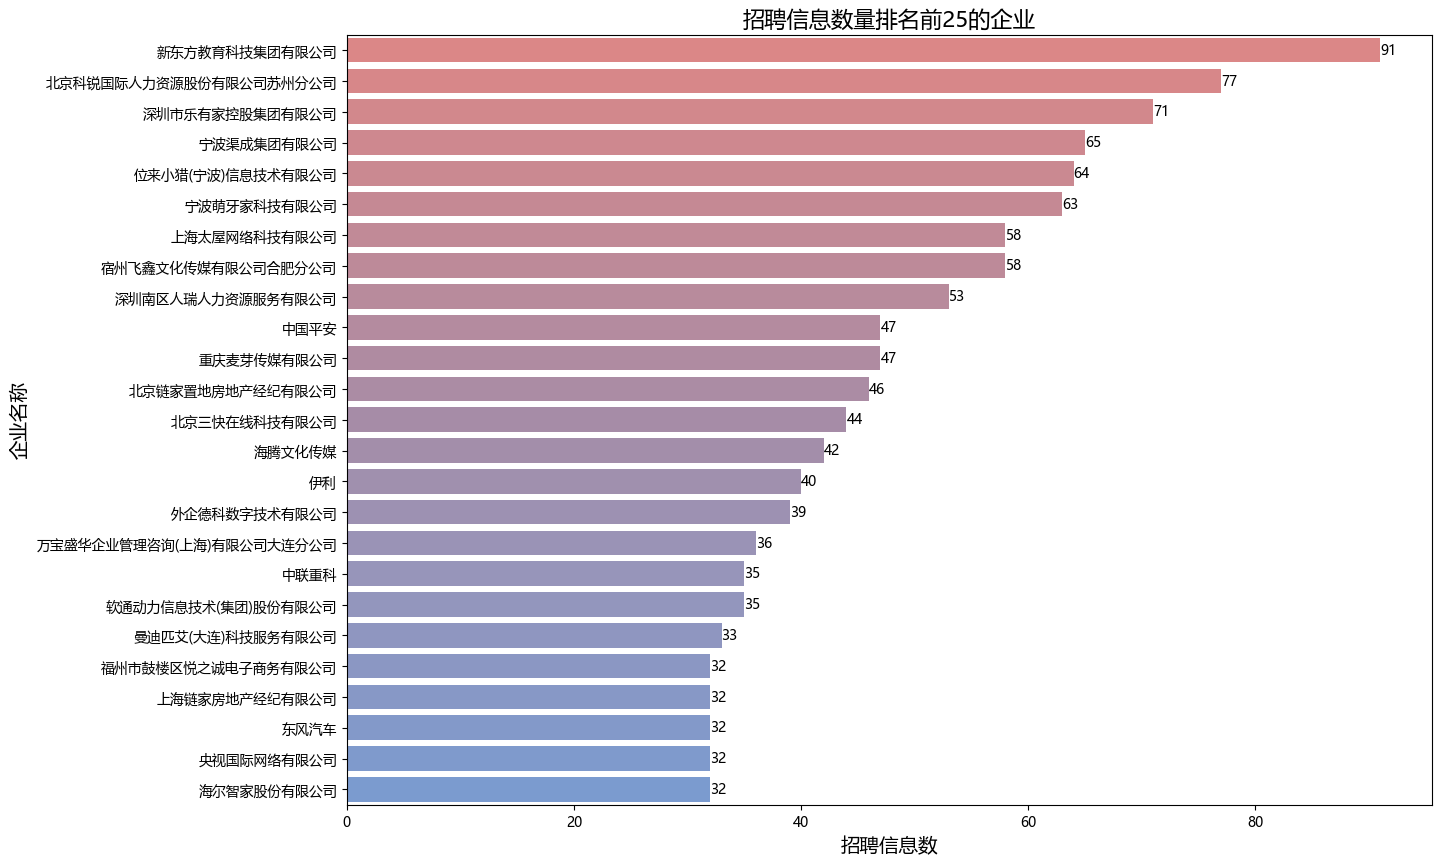

In [64]:
# 条形图绘制
top_25_comp = comp_ad_counts.head(25)

colors = ['#E97979', '#6D97DD']
palette = sns.blend_palette(colors, n_colors=len(top_25_comp))

plt.figure(figsize=(14, 10))
ax = sns.barplot(x='comp_ad_counts', y='企业名称', data=top_25_comp, palette=palette)

for index, value in enumerate(top_25_comp['comp_ad_counts']):
    ax.text(value, index, f'{value}', color='black', ha='left', va='center')

plt.title('招聘信息数量排名前25的企业', fontsize=16)
plt.xlabel('招聘信息数', fontsize=14)
plt.ylabel('企业名称', fontsize=14)

plt.show()

In [ ]:
comp_ad_counts_output = "..\\data\\task1\\comp_ad_counts.xlsx"
comp_ad_counts.to_excel(comp_ad_counts_output, index = False, engine = 'openpyxl')